In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE, MDS
import os

notebook_folder_path = "notebooks/example"

In [2]:
# Load the dataset
csv_file_path = os.path.join(notebook_folder_path, "high-level-data.csv")
dfh = pd.read_csv(csv_file_path)

In [3]:
# Compute Nonconformity scores as 1 - softmax score
dfh["Nonconformity Score (Color)"] = 1 - dfh["Softmax Score (Color)"]
dfh["Nonconformity Score (Type)"] = 1 - dfh["Softmax Score (Type)"]

95th percentile of Color's Nonconformity scores: 0.6125
95th percentile of Type's Nonconformity scores: 0.5750000000000001


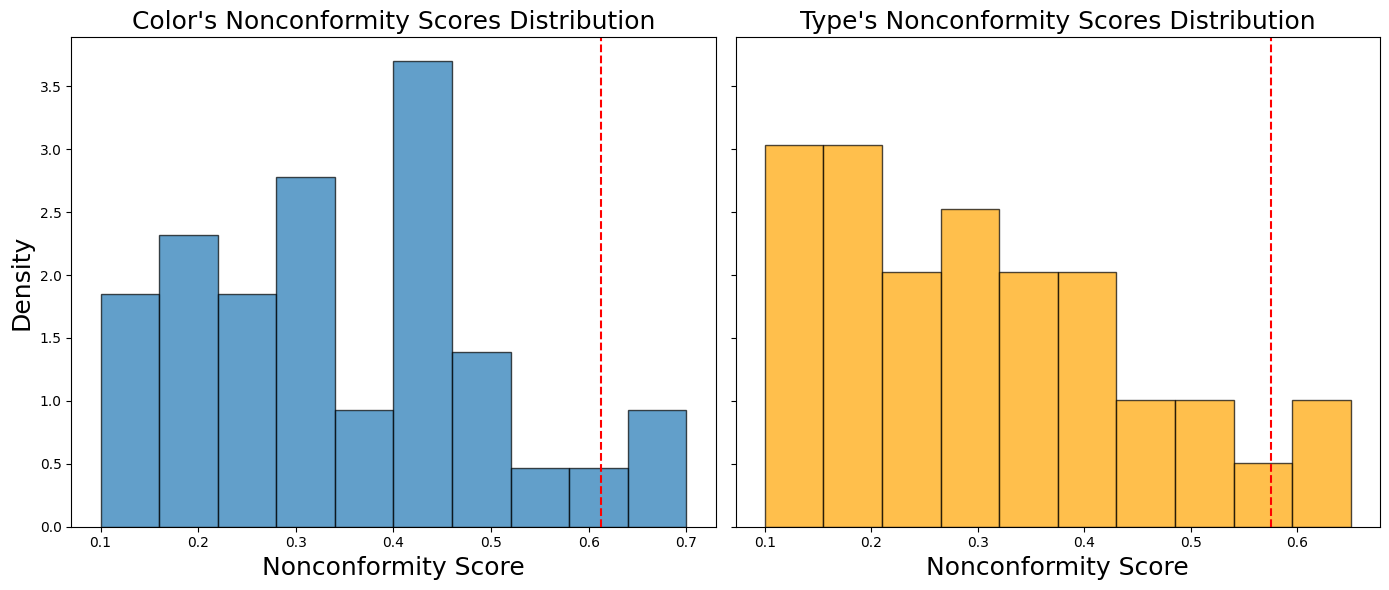

In [4]:
fontsize = 18

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram for Color Nonconformity scores
axes[0].hist(
    dfh["Nonconformity Score (Color)"],
    bins=10,
    alpha=0.7,
    edgecolor="black",
    density=True,
)
axes[0].axvline(
    np.percentile(dfh["Nonconformity Score (Color)"], 95),
    color="red",
    linestyle="dashed",
)
axes[0].set_title("Color's Nonconformity Scores Distribution", fontsize=fontsize)
axes[0].set_xlabel("Nonconformity Score", fontsize=fontsize)
axes[0].set_ylabel("Density", fontsize=fontsize)

# Histogram for Type Nonconformity scores
axes[1].hist(
    dfh["Nonconformity Score (Type)"],
    bins=10,
    alpha=0.7,
    edgecolor="black",
    density=True,
    color="orange",
)
axes[1].axvline(
    np.percentile(dfh["Nonconformity Score (Type)"], 95),
    color="red",
    linestyle="dashed",
)
axes[1].set_title("Type's Nonconformity Scores Distribution", fontsize=fontsize)
axes[1].set_xlabel("Nonconformity Score", fontsize=fontsize)

print(
    "95th percentile of Color's Nonconformity scores:",
    np.percentile(dfh["Nonconformity Score (Color)"], 95),
)
print(
    "95th percentile of Type's Nonconformity scores:",
    np.percentile(dfh["Nonconformity Score (Type)"], 95),
)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

95th percentile: 0.6225000000000002


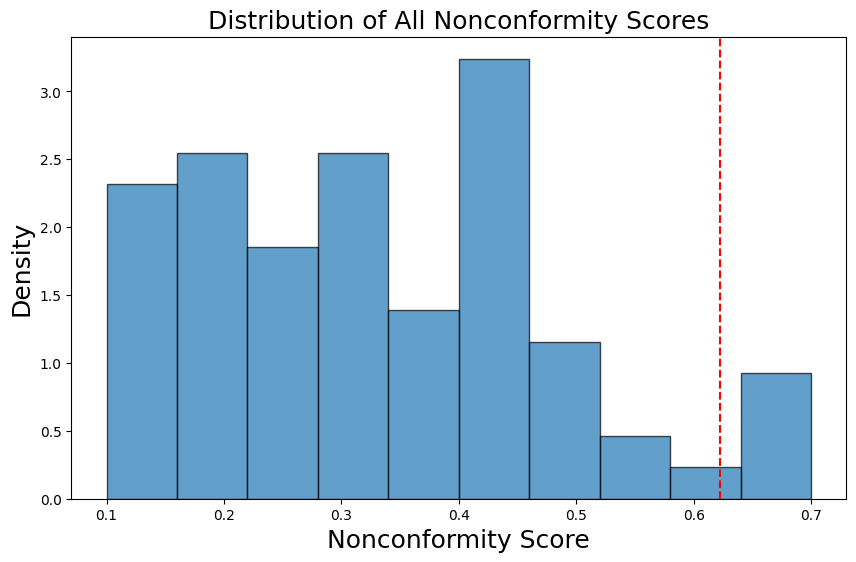

In [5]:
all_data_df = pd.concat(
    [dfh["Nonconformity Score (Color)"], dfh["Nonconformity Score (Type)"]]
)

# Plot the distribution of all Nonconformity scores
plt.figure(figsize=(10, 6))

# Histogram for all Nonconformity scores
plt.hist(all_data_df, bins=10, alpha=0.7, edgecolor="black", density=True)

# Calculate the 95th percentile line
percentile_95_all = np.percentile(all_data_df, 95)
print(f"95th percentile: {percentile_95_all}")

# Draw vertical line at the 95th percentile
plt.axvline(percentile_95_all, color="red", linestyle="dashed")

# Labels and legend
plt.xlabel("Nonconformity Score", fontsize=fontsize)
plt.ylabel("Density", fontsize=fontsize)
plt.title("Distribution of All Nonconformity Scores", fontsize=fontsize)

# Show the plot
plt.show()

95th percentile of Truck class's Nonconformity scores: 0.37249999999999994
95th percentile of White class's Nonconformity scores: 0.6399999999999999


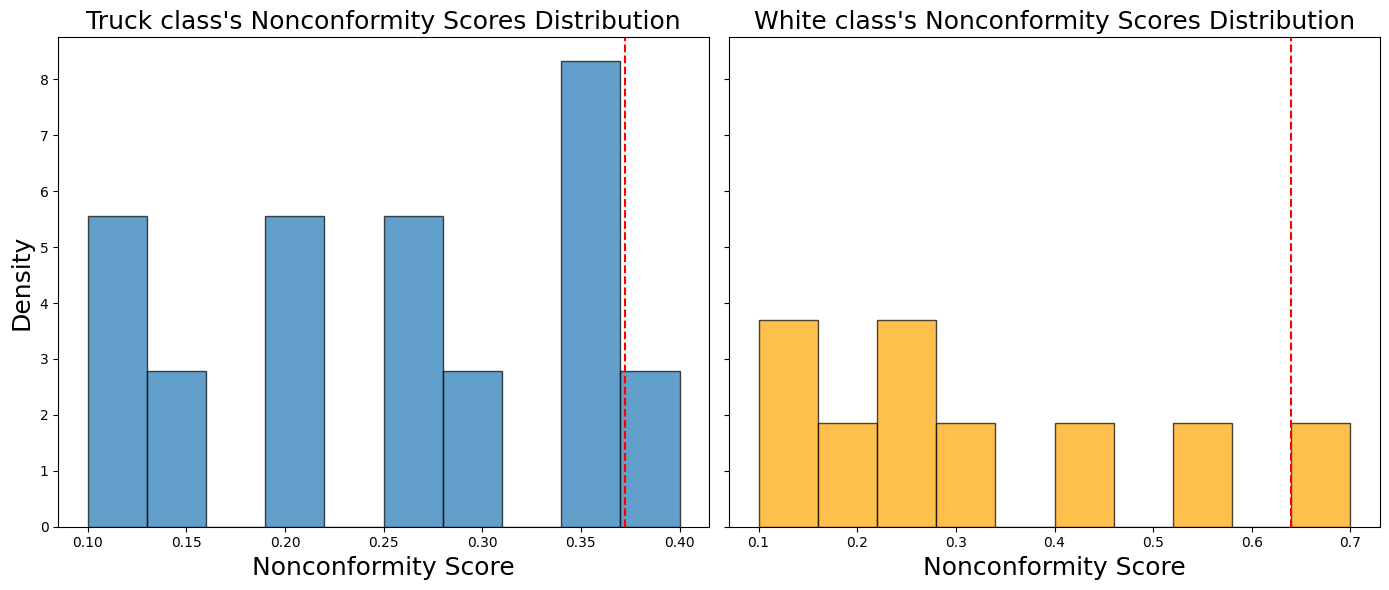

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

task1 = "Type"
gt1 = "Truck"

axes[0].hist(
    dfh[dfh[f"Ground Truth ({task1})"] == gt1][f"Nonconformity Score ({task1})"],
    bins=10,
    alpha=0.7,
    edgecolor="black",
    density=True,
)
axes[0].axvline(
    np.percentile(
        dfh[dfh[f"Ground Truth ({task1})"] == gt1][f"Nonconformity Score ({task1})"], 95
    ),
    color="red",
    linestyle="dashed",
)
axes[0].set_title(f"{gt1} class's Nonconformity Scores Distribution", fontsize=fontsize)
axes[0].set_xlabel("Nonconformity Score", fontsize=fontsize)
axes[0].set_ylabel("Density", fontsize=fontsize)

task2 = "Color"
gt2 = "White"

axes[1].hist(
    dfh[dfh[f"Ground Truth ({task2})"] == gt2][f"Nonconformity Score ({task2})"],
    bins=10,
    alpha=0.7,
    edgecolor="black",
    density=True,
    color="orange",
)
axes[1].axvline(
    np.percentile(
        dfh[dfh[f"Ground Truth ({task2})"] == gt2][f"Nonconformity Score ({task2})"], 95
    ),
    color="red",
    linestyle="dashed",
)
axes[1].set_title(f"{gt2} class's Nonconformity Scores Distribution", fontsize=fontsize)
axes[1].set_xlabel("Nonconformity Score", fontsize=fontsize)

print(
    f"95th percentile of {gt1} class's Nonconformity scores:",
    np.percentile(
        dfh[dfh[f"Ground Truth ({task1})"] == gt1][f"Nonconformity Score ({task1})"], 95
    ),
)
print(
    f"95th percentile of {gt2} class's Nonconformity scores:",
    np.percentile(
        dfh[dfh[f"Ground Truth ({task2})"] == gt2][f"Nonconformity Score ({task2})"], 95
    ),
)

plt.tight_layout()
plt.show()

In [7]:
# Calculate and print the 95th percentile for each class in colors
color_classes = dfh["Ground Truth (Color)"].unique()
print("95th percentiles for each class in colors:")
for color in color_classes:
    percentile = np.percentile(
        dfh[dfh["Ground Truth (Color)"] == color]["Nonconformity Score (Color)"], 95
    )
    print(f"{color}: {percentile}")

# Calculate and print the 95th percentile for each class in types
type_classes = dfh["Ground Truth (Type)"].unique()
print("\n95th percentiles for each class in types:")
for type_ in type_classes:
    percentile = np.percentile(
        dfh[dfh["Ground Truth (Type)"] == type_]["Nonconformity Score (Type)"], 95
    )
    print(f"{type_}: {percentile}")

95th percentiles for each class in colors:
Black: 0.48
White: 0.6399999999999999
Red: 0.5599999999999999
Blue: 0.59

95th percentiles for each class in types:
Car: 0.595
Motorcycle: 0.5674999999999999
Truck: 0.37249999999999994


Percentiles for Blue class's Nonconformity Scores:
50th Percentile: 0.30000000000000004
60th Percentile: 0.38
70th Percentile: 0.42999999999999994
80th Percentile: 0.47
90th Percentile: 0.53


Text(0, 0.5, 'Density')

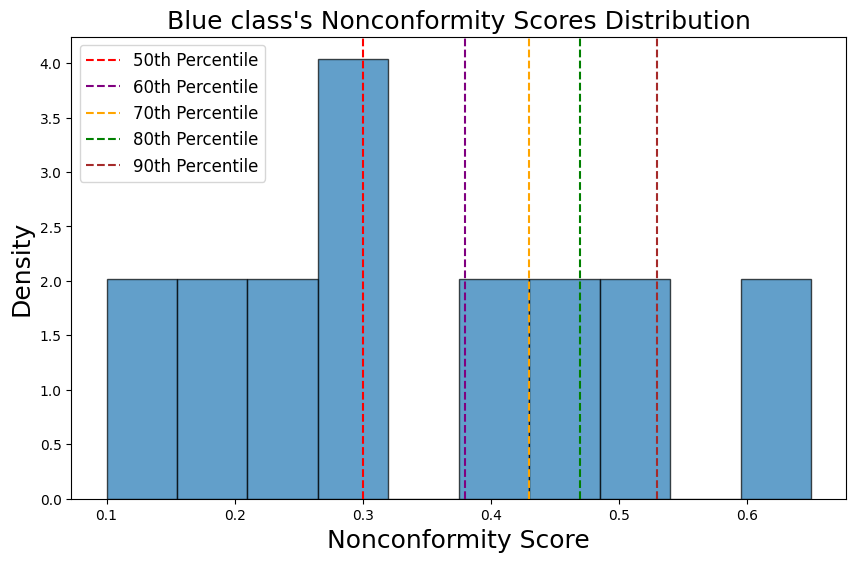

In [8]:
task = "Color"
gt = "Blue"

plt.figure(figsize=(10, 6))
plt.hist(
    dfh[dfh[f"Ground Truth ({task})"] == gt][f"Nonconformity Score ({task})"],
    bins=10,
    alpha=0.7,
    edgecolor="black",
    density=True,
)
percentiles = [50, 60, 70, 80, 90]
colors = ["red", "purple", "orange", "green", "brown"]
labels = [
    "50th Percentile",
    "60th Percentile",
    "70th Percentile",
    "80th Percentile",
    "90th Percentile",
]

# Calculate and print the percentiles
print(f"Percentiles for {gt} class's Nonconformity Scores:")
for p in percentiles:
    value = np.percentile(
        dfh[dfh[f"Ground Truth ({task})"] == gt][f"Nonconformity Score ({task})"], p
    )
    print(f"{p}th Percentile: {value}")

# Add vertical lines for each percentile
for p, color, label in zip(percentiles, colors, labels):
    plt.axvline(
        np.percentile(
            dfh[dfh[f"Ground Truth ({task})"] == gt][f"Nonconformity Score ({task})"], p
        ),
        color=color,
        linestyle="dashed",
        label=label,
    )

plt.legend(fontsize=12)
plt.title(f"{gt} class's Nonconformity Scores Distribution", fontsize=fontsize)
plt.xlabel("Nonconformity Score", fontsize=fontsize)
plt.ylabel("Density", fontsize=fontsize)

In [9]:
# Define the percentiles to calculate
percentiles = [50, 60, 70, 80, 90]

# Initialize dictionaries to store embeddings
color_embeddings = {}
type_embeddings = {}

# Calculate percentiles for each color class and store in embeddings
for color in color_classes:
    color_embeddings[color] = [
        np.percentile(
            dfh[dfh["Ground Truth (Color)"] == color]["Nonconformity Score (Color)"], p
        )
        for p in percentiles
    ]

# Calculate percentiles for each type class and store in embeddings
for type_ in type_classes:
    type_embeddings[type_] = [
        np.percentile(
            dfh[dfh["Ground Truth (Type)"] == type_]["Nonconformity Score (Type)"], p
        )
        for p in percentiles
    ]

# Print the embeddings
print("Color Embeddings:")
for color, embedding in color_embeddings.items():
    print(f"{color}: {embedding}")

print("\nType Embeddings:")
for type_, embedding in type_embeddings.items():
    print(f"{type_}: {embedding}")

Color Embeddings:
Black: [0.35, 0.39, 0.4, 0.42000000000000004, 0.45999999999999996]
White: [0.25, 0.29000000000000004, 0.36, 0.4600000000000001, 0.5800000000000001]
Red: [0.30000000000000004, 0.38, 0.42999999999999994, 0.47, 0.52]
Blue: [0.30000000000000004, 0.38, 0.42999999999999994, 0.47, 0.53]

Type Embeddings:
Car: [0.30000000000000004, 0.30000000000000004, 0.36999999999999994, 0.4800000000000001, 0.545]
Motorcycle: [0.375, 0.4, 0.43499999999999994, 0.44999999999999996, 0.495]
Truck: [0.25, 0.28, 0.33499999999999996, 0.35, 0.35]


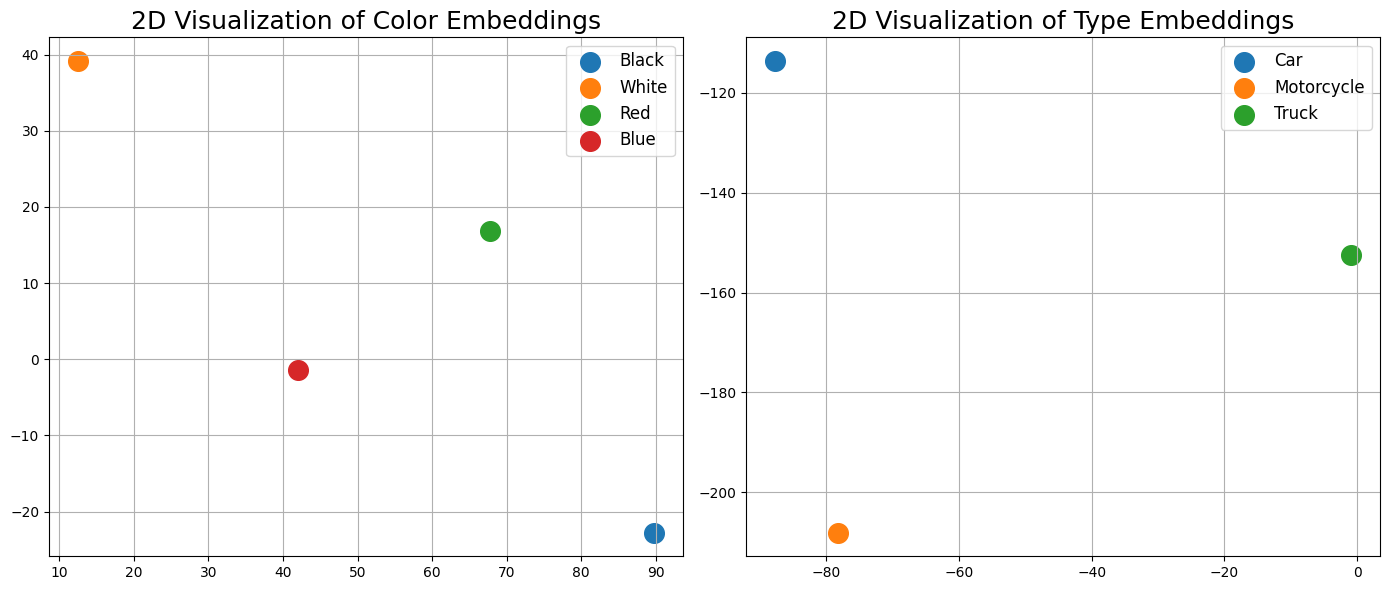

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_color_embeddings = tsne.fit_transform(
    np.vstack(list(color_embeddings.values()))
)
reduced_type_embeddings = tsne.fit_transform(np.vstack(list(type_embeddings.values())))

# Plot color embeddings
axes[0].grid(True)
for i, color in enumerate(color_embeddings.keys()):
    axes[0].scatter(
        reduced_color_embeddings[i, 0],
        reduced_color_embeddings[i, 1],
        label=color,
        s=200,
    )
axes[0].set_title("2D Visualization of Color Embeddings", fontsize=fontsize)
axes[0].legend(fontsize=12)

# Plot type embeddings
axes[1].grid(True)
for i, type in enumerate(type_embeddings.keys()):
    axes[1].scatter(
        reduced_type_embeddings[i, 0], reduced_type_embeddings[i, 1], label=type, s=200
    )
axes[1].set_title("2D Visualization of Type Embeddings", fontsize=fontsize)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()

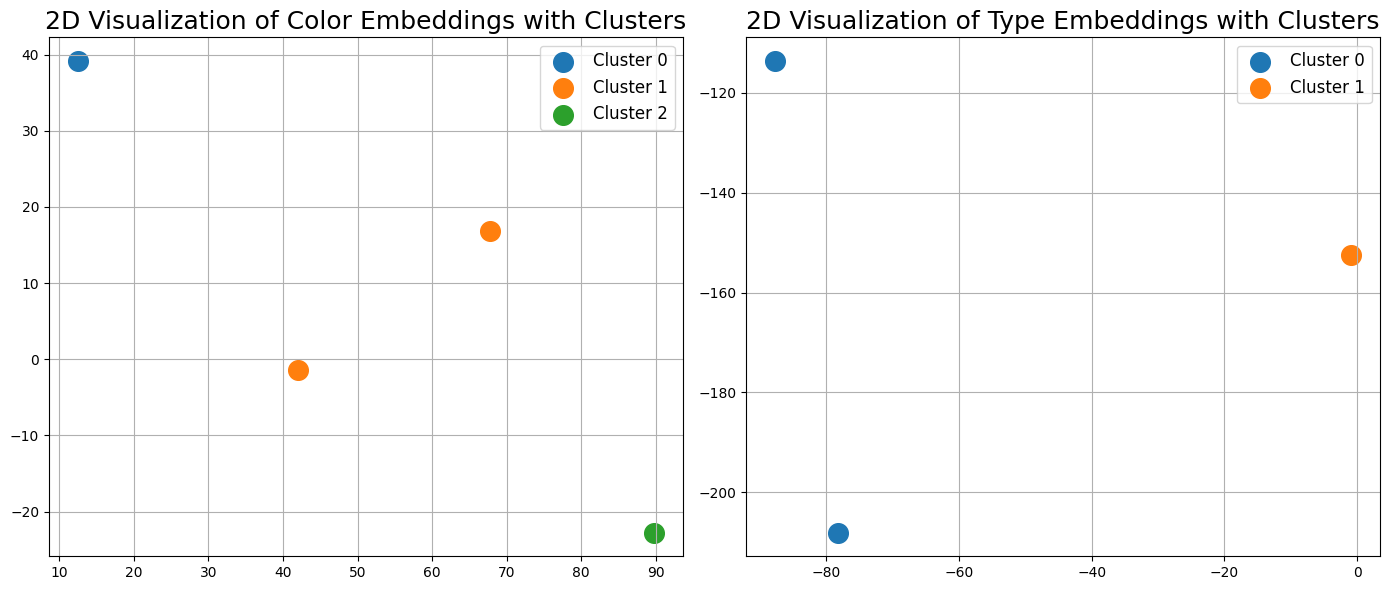

In [11]:
# Cluster the color embeddings into 3 clusters
color_kmeans = KMeans(n_clusters=3, random_state=42)
color_clusters = color_kmeans.fit_predict(list(color_embeddings.values()))

# Cluster the type embeddings into 2 clusters
type_kmeans = KMeans(n_clusters=2, random_state=42)
type_clusters = type_kmeans.fit_predict(list(type_embeddings.values()))

# Add the cluster assignments to the dataframe
# Map the color clusters to the corresponding ground truth colors
color_cluster_mapping = dict(zip(color_embeddings.keys(), color_kmeans.labels_))
dfh["Color Cluster"] = dfh["Ground Truth (Color)"].map(color_cluster_mapping)

# Map the type clusters to the corresponding ground truth types
type_cluster_mapping = dict(zip(type_embeddings.keys(), type_kmeans.labels_))
dfh["Type Cluster"] = dfh["Ground Truth (Type)"].map(type_cluster_mapping)

# Plot the reduced color embeddings with clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].grid(True)
for cluster in np.unique(color_clusters):
    cluster_points = reduced_color_embeddings[color_clusters == cluster]
    axes[0].scatter(
        cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", s=200
    )
axes[0].set_title(
    "2D Visualization of Color Embeddings with Clusters", fontsize=fontsize
)
axes[0].legend(fontsize=12)

# Plot the reduced type embeddings with clusters
axes[1].grid(True)
for cluster in np.unique(type_clusters):
    cluster_points = reduced_type_embeddings[type_clusters == cluster]
    axes[1].scatter(
        cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", s=200
    )
axes[1].set_title(
    "2D Visualization of Type Embeddings with Clusters", fontsize=fontsize
)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()

In [12]:
# Calculate the 95th percentile of the nonconformity scores for each color cluster
print("95th percentiles for color clusters:")
for cluster in np.unique(dfh["Color Cluster"]):
    cluster_scores = dfh[dfh["Color Cluster"] == cluster]["Nonconformity Score (Color)"]
    percentile_95 = np.percentile(cluster_scores, 95)
    print(f"Cluster {cluster}: {percentile_95}")

# Calculate the 95th percentile of the nonconformity scores for each type cluster
print("\n95th percentiles for type clusters:")
for cluster in np.unique(dfh["Type Cluster"]):
    cluster_scores = dfh[dfh["Type Cluster"] == cluster]["Nonconformity Score (Type)"]
    percentile_95 = np.percentile(cluster_scores, 95)
    print(f"Cluster {cluster}: {percentile_95}")

95th percentiles for color clusters:
Cluster 0: 0.6399999999999999
Cluster 1: 0.6074999999999999
Cluster 2: 0.48

95th percentiles for type clusters:
Cluster 0: 0.6349999999999998
Cluster 1: 0.37249999999999994


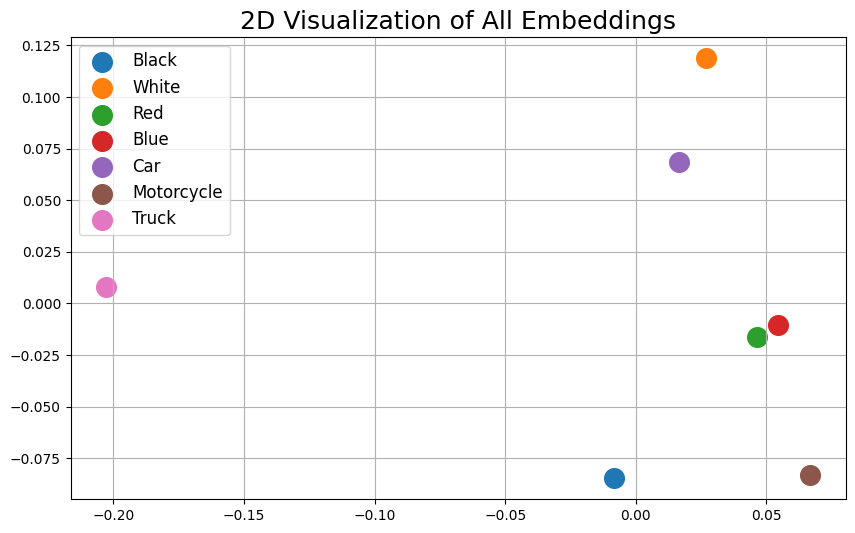

In [13]:
# Combine color and type embeddings into a single dataset
all_embeddings = list(color_embeddings.values()) + list(type_embeddings.values())
all_labels = list(color_embeddings.keys()) + list(type_embeddings.keys())

# Apply t-SNE for dimensionality reduction
mds = MDS(n_components=2, random_state=42, n_init=5)
reduced_embeddings = mds.fit_transform(np.vstack(all_embeddings))

# Plot the reduced embeddings
plt.figure(figsize=(10, 6))
for i, label in enumerate(all_labels):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=label, s=200)

plt.title("2D Visualization of All Embeddings", fontsize=fontsize)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

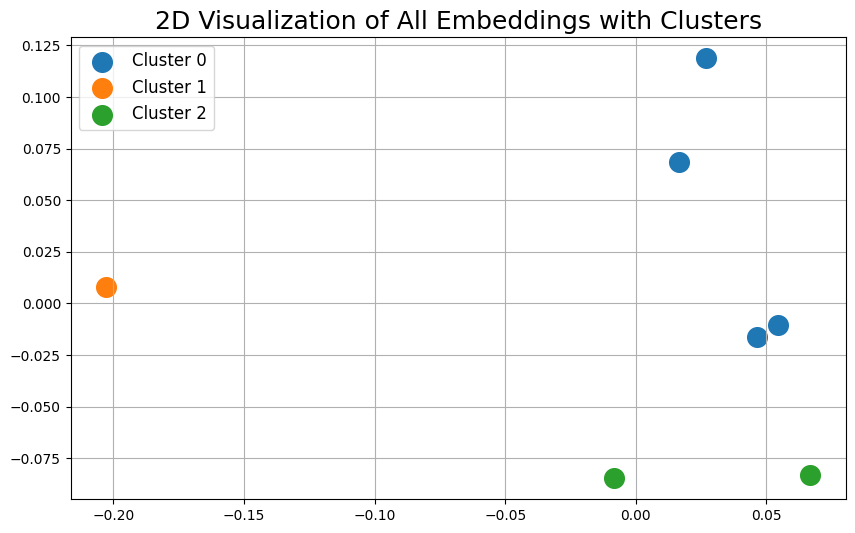

In [14]:
# Cluster all the embeddings into 3 clusters
all_kmeans = KMeans(n_clusters=3, random_state=42)
all_clusters = all_kmeans.fit_predict(all_embeddings)

# Map the all clusters to the corresponding labels
all_cluster_mapping = dict(zip(all_labels, all_clusters))
dfh["All Cluster (Color)"] = dfh["Ground Truth (Color)"].map(all_cluster_mapping)
dfh["All Cluster (Type)"] = dfh["Ground Truth (Type)"].map(all_cluster_mapping)

# Plot the reduced embeddings with clusters
plt.figure(figsize=(10, 6))
plt.grid(True)
for cluster in np.unique(all_clusters):
    cluster_points = reduced_embeddings[all_clusters == cluster]
    plt.scatter(
        cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", s=200
    )

plt.title("2D Visualization of All Embeddings with Clusters", fontsize=fontsize)
plt.legend(fontsize=12, loc="upper left")
plt.show()

In [15]:
# Calculate the 95th percentile of the combined nonconformity scores for each cluster in all clusters
print("95th percentiles for all clusters (combined):")
for cluster in np.unique(all_clusters):
    cluster_scores = pd.concat(
        [
            dfh[dfh["All Cluster (Color)"] == cluster]["Nonconformity Score (Color)"],
            dfh[dfh["All Cluster (Type)"] == cluster]["Nonconformity Score (Type)"],
        ]
    )

    percentile_95 = np.percentile(cluster_scores, 95)

    print(
        f"Cluster {cluster}: Combined Nonconformity Score 95th Percentile: {percentile_95}"
    )

95th percentiles for all clusters (combined):
Cluster 0: Combined Nonconformity Score 95th Percentile: 0.65
Cluster 1: Combined Nonconformity Score 95th Percentile: 0.37249999999999994
Cluster 2: Combined Nonconformity Score 95th Percentile: 0.5


In [16]:
csv_file_path_low_level = os.path.join(notebook_folder_path, "low-level-data.csv")
dfl = pd.read_csv(csv_file_path_low_level)
dfl

,Class,Softmax Score
0,Black Car,0.23
1,Black Car,0.24
2,Black Car,0.26
3,Black Car,0.27
4,Black Car,0.28
...,...,...
139,Blue Motorcycle,0.46
140,Blue Motorcycle,0.52
141,Blue Motorcycle,0.55
142,Blue Motorcycle,0.53


In [17]:
dfl["Nonconformity Score"] = 1 - dfl["Softmax Score"]

In [18]:
percentiles = [50, 60, 70, 80, 90]

low_level_embeddings = {}

for class_ in dfl["Class"].unique():
    low_level_embeddings[class_] = [
        np.percentile(dfl[dfl["Class"] == class_]["Nonconformity Score"], p)
        for p in percentiles
    ]

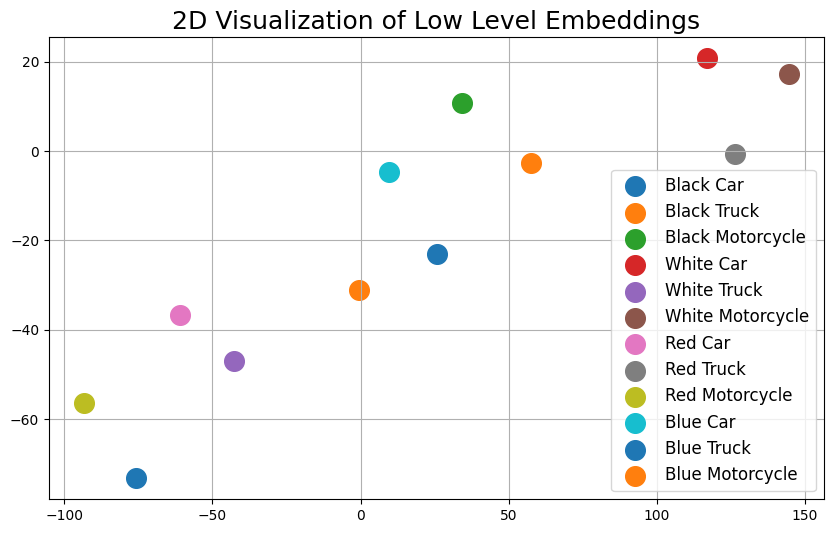

In [19]:
tsne = TSNE(n_components=2, random_state=42, perplexity=4)
reduced_low_level_embeddings = tsne.fit_transform(
    np.vstack(list(low_level_embeddings.values()))
)

# Plot the reduced embeddings
plt.figure(figsize=(10, 6))
for i, label in enumerate(low_level_embeddings.keys()):
    plt.scatter(
        reduced_low_level_embeddings[i, 0],
        reduced_low_level_embeddings[i, 1],
        label=label,
        s=200,
    )

plt.title("2D Visualization of Low Level Embeddings", fontsize=fontsize)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [20]:
low_level_kmeans = KMeans(n_clusters=3, random_state=42)
low_level_clusters = low_level_kmeans.fit_predict(list(low_level_embeddings.values()))

low_level_cluster_mapping = dict(zip(low_level_embeddings.keys(), low_level_clusters))
dfl["Low-Level Cluster"] = (
    dfl["Class"]
    .map(low_level_cluster_mapping)
    .fillna(dfl["Class"].map(low_level_cluster_mapping))
)

In [21]:
reduced_low_level_embeddings

array([[-75.92427   , -73.2491    ],
       [ 57.67618   ,  -2.6871977 ],
       [ 34.342884  ,  10.81332   ],
       [116.79883   ,  20.761272  ],
       [-42.768433  , -47.061234  ],
       [144.53287   ,  17.17639   ],
       [-60.89829   , -36.748966  ],
       [126.2838    ,  -0.66537935],
       [-93.25625   , -56.470093  ],
       [  9.523912  ,  -4.803557  ],
       [ 25.912935  , -23.025463  ],
       [ -0.6426646 , -31.129982  ]], dtype=float32)

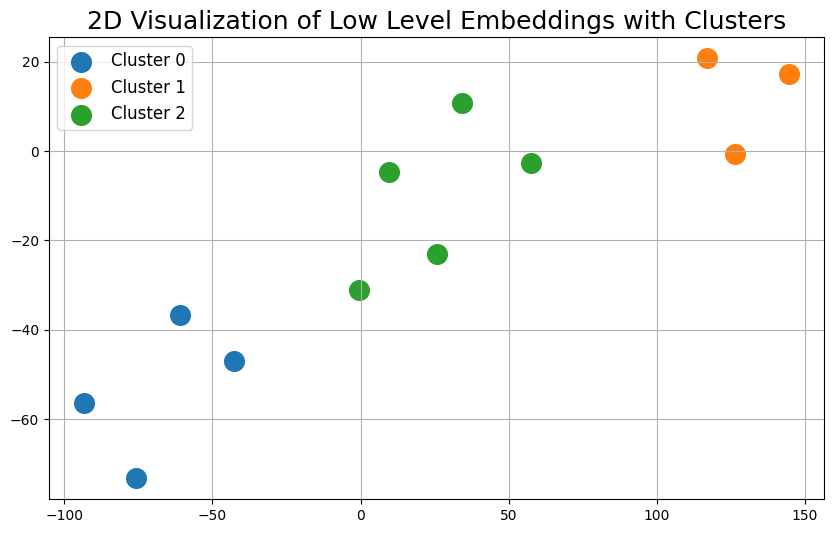

In [22]:
plt.figure(figsize=(10, 6))
plt.grid(True)
for cluster in np.unique(low_level_clusters):
    cluster_points = reduced_low_level_embeddings[low_level_clusters == cluster]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f"Cluster {cluster}",
        s=200,
    )

plt.title("2D Visualization of Low Level Embeddings with Clusters", fontsize=fontsize)
plt.legend(fontsize=12, loc="upper left")
plt.show()

In [23]:
for cluster in np.unique(dfl["Low-Level Cluster"]):
    cluster_scores = dfl[dfl["Low-Level Cluster"] == cluster]["Nonconformity Score"]
    percentile_95 = np.percentile(cluster_scores, 95)
    print(f"Cluster {cluster}: {percentile_95}")

Cluster 0: 0.77
Cluster 1: 0.735
Cluster 2: 0.77
